In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as sps
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


### (a)

In [2]:
df = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')
num_samples = df.shape[0]
num_features = df.shape[1] - 1
print(f'Number of samples: {num_samples}')
print(f'Number of features: {num_features}')
missing_vals = (df.isnull().sum()).sum()
print(f'Number of missing values = {missing_vals}')
print('The target variable is Diabetes_binary where a value of 0 represents no diabetes and 1 represents prediabetes/diabetes.')
categorical_variables = ['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 
                         'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'DiffWalk', 'Sex', 'Education', 'Income']
print(f'List of categorical variables: {categorical_variables}')
num_categorical_variables = len(categorical_variables)
print(f'Number of categorical variables = {num_categorical_variables}')
numerical_variables = [col for col in df.columns if col not in categorical_variables]
print(f'List of numerical variables: {numerical_variables}')
num_numerical_variables = len(numerical_variables)
print(f'Number of numerical variables = {num_numerical_variables}')
categorical_values = {col: df[col].unique().tolist() for col in categorical_variables}
print(f'Possible values for categorical variables: {categorical_values}')

Number of samples: 253680
Number of features: 21
Number of missing values = 0
The target variable is Diabetes_binary where a value of 0 represents no diabetes and 1 represents prediabetes/diabetes.
List of categorical variables: ['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'DiffWalk', 'Sex', 'Education', 'Income']
Number of categorical variables = 18
List of numerical variables: ['BMI', 'MentHlth', 'PhysHlth', 'Age']
Number of numerical variables = 4
Possible values for categorical variables: {'Diabetes_binary': [0.0, 1.0], 'HighBP': [1.0, 0.0], 'HighChol': [1.0, 0.0], 'CholCheck': [1.0, 0.0], 'Smoker': [1.0, 0.0], 'Stroke': [0.0, 1.0], 'HeartDiseaseorAttack': [0.0, 1.0], 'PhysActivity': [0.0, 1.0], 'Fruits': [0.0, 1.0], 'Veggies': [1.0, 0.0], 'HvyAlcoholConsump': [0.0, 1.0], 'AnyHealthcare': [1.0, 0.0], 'NoDocbcCost': [0.0, 1.0], 'G

There are 253680 samples, 21 features, and 1 target variable in the dataset. Each sample represents an individual particpant in the BRFSS telephone survey. The are 18 categorical variables I will briefly discuss the possible values of each categorical variable and what they represent:

Diabetes_binary: 1.0: Diabetic, 0.0: Non-diabetic

HighBP: 1.0: Has high blood pressure, 0.0: Does not have high blood pressure

HighChol: 1.0: Has high cholesterol, 0.0: Does not have high cholesterol

CholCheck: 1.0: Cholesterol was checked in the past 5 years, 0.0: Cholesterol was not checked in the past 5 years

Smoker: 1.0: Has smoked 100 cigarettes in lifetime, 0.0: Has not smoked 100 cigarettes in lifetime

Stroke: 1.0: Has had a stroke, 0.0: Has not experienced a stroke

HeartDiseaseorAttack: 1.0: Has coronary heart disease or has had a heart attack, 0.0: Does not have heart disease or has not had a heart attack

PhysActivity: 1.0: Has performed physical activity in the past 30 days, 0.0: Has not performed physical activity in the past 30 days

Fruits: 1.0: Consumes fruit at least once per day, 0.0: Does not consume fruit daily

Veggies: 1.0: Consumes veggies at least once per day, 0.0: Does not consume veggies daily

HvyAlcoholConsump: 1.0: Men drinking more than 14 drinks per week or women drinking more than 7 drinks per week, 0.0: Men drinking less than 14 drinks per week or women drinking less than 7 drinks per week

AnyHealthcare: 1.0: Has healthcare coverage, 0.0: Does not have healthcare coverage

NoDocbcCost: 1.0: Could not see doctor in the past 12 months due to cost, 0.0: Cost was no a factor in seeing doctor

GenHlth: 5.0: Excellent, 4.0: Very good, 3.0: Good, 2.0: Fair, 1.0: Poor

DiffWalk: 1.0: Has difficulty walking or climbing stairs, 0.0: Does not have difficulty walking or climbing stairs

Sex: 1.0: Male, 0.0: Female

Education: 1.0: Never attended school or only kindergarten, 2.0: Grades 1 through 8, 3.0: Some high school, 4.0: High school graduate, 5.0: Some college or technical school, 6.0: College graduate

Income: 1.0: Less than 10,000 dollars, 2.0: 10,000 to 15,000 dollars, 3.0: 15,000 to 20,000 dollars, 4.0: 20,000 to 25,000 dollars, 5.0: 25,000 to 35,000 dollars, 6.0: 35,000 to 50,000 dollars, 7.0: 50,000 to 75,000 dollars, 8.0: 75,000 dollars or more.

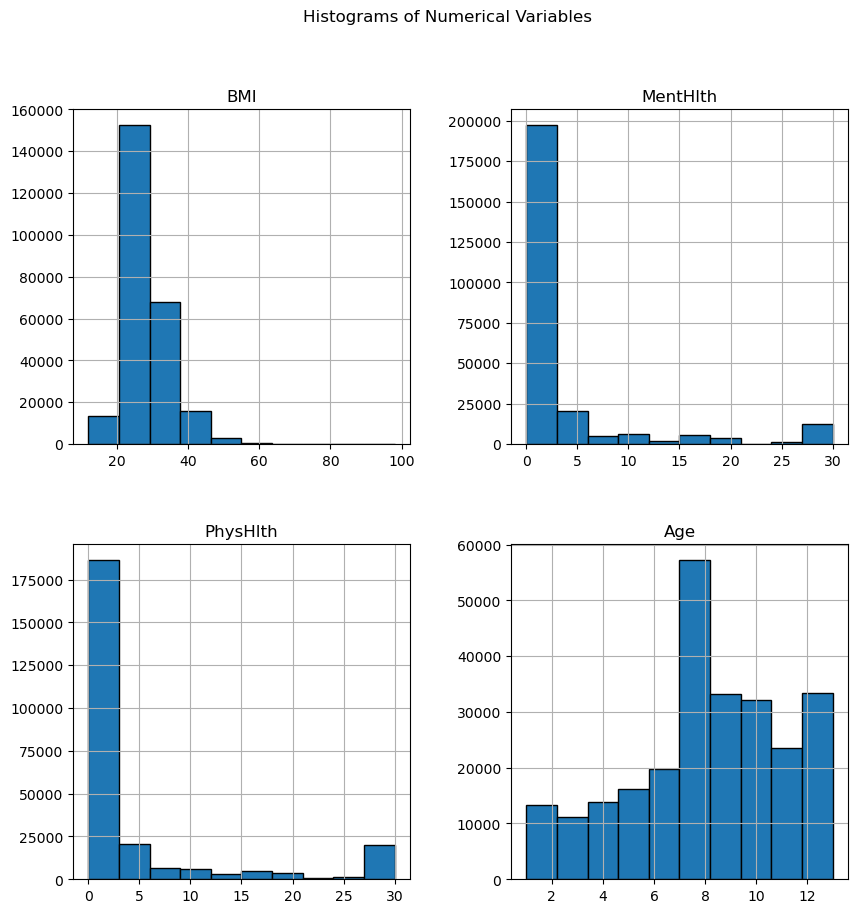

In [3]:
df[numerical_variables].hist(figsize=(10, 10), edgecolor="black")
plt.suptitle("Histograms of Numerical Variables")
plt.show()

Above I have created histograms for all of the numerical variables in the dataset. We see that the distribution of BMI is right skewed with most values concentrated between 20 and 40 so most individuals fall into the healthy to obese range. The distribution of MentHlth is skewed to the right with majority of individuals reporting that they experienced 0 days of poor mental health over the last 30 days. The distribution of PhysHlth is also skewed to the right with majority of individuals reporting that they experienced 0 days of poor physical health over the past 30 days. The age variable appears to have a uniform distribution. Although BMI, MentHlth, and PhysHlth are skewed I will not be applying transformations to reduce skewness as these dsitrbutions reflect real life patterns and transforming them may reduce the models ability to capture real world trends and use them to predict if an individual is not diabetic or prediabetic/diabetic. 

In [4]:
for col in numerical_variables:
    correlation, p_value = sps.pointbiserialr(df[col], df['Diabetes_binary'])
    print(f'Correlation between {col} and Diabetes_binary: {correlation}, p: {p_value}')

Correlation between BMI and Diabetes_binary: 0.2168430602033486, p: 0.0
Correlation between MentHlth and Diabetes_binary: 0.06931508263849726, p: 1.1432833380244077e-267
Correlation between PhysHlth and Diabetes_binary: 0.17133670038681292, p: 0.0
Correlation between Age and Diabetes_binary: 0.17744187216736435, p: 0.0


Above we first calculate the correlation between each numerical variable and the target variable Diabetes_binary. To do this we compute the point biserial correlation which measure the relationship between a binary variable and a continuous variable. In this case the binary variable is the target variable Diabetes_binary and the continuous variables are the numerical variables 'BMI', 'MentHlth', 'PhysHlth', 'Age'. Point biserial correlation function returns two values the correlation coefficient and a p value. The p value is the probability that the correlation between the two variables is due to chance. A p value less than 0.05 means the observed correlation is unlikely to be due to chance and is statistically significant. 

We see that BMI and Diabetes_binary have a moderate positive correlation as they have a correlation value of 0.2168 and a p value of 0.0 meaning it is statistically significant. Higher BMI values are associated with a higher likelihood of being diabetic. Next, we see that MentHlth and Diabetes_binary have a weak positive correlation as they have a correlation value of 0.06931 and a p value approximately equal to 0 meaning it is statistically significant. Poor mental health days have some association with diabetes but the relationship is not strong but we will still include it in the model. Next, we see that PhysHlth and Diabetes_binary have a moderate correlation with a correlation value of 0.1713 and a p value of 0.0 meaning it is statistically significant. More days of poor physical health are associated with a higher likelihood of being diabetic. Finally we see that Age and Diabetes_binary have a moderate positive correlation as they have a correlation value of 0.1774 and a p value of 0 meaning it is statistically significant. Older individuals are more likely to have diabetes. 

https://medium.com/@TheDataScience-ProF/point-biserial-correlation-32440e373718

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pointbiserialr.html

In [5]:
chi_square_results = {}
for col in categorical_variables:
    if col != 'Diabetes_binary':  
        contingency_table = pd.crosstab(df[col], df['Diabetes_binary']) # frequency dist of variables, row correponds to categorical variable col corresponds to target variable
        chi2, p, dof, expected = sps.chi2_contingency(contingency_table)
        chi_square_results[col] = (chi2, p)
        print(f'Feature: {col}, Chi square statistic: {chi2}, p: {p}')

Feature: HighBP, Chi square statistic: 17562.446089970756, p: 0.0
Feature: HighChol, Chi square statistic: 10174.074889118883, p: 0.0
Feature: CholCheck, Chi square statistic: 1062.9381436620106, p: 3.7513988789188705e-233
Feature: Smoker, Chi square statistic: 937.0557592033365, p: 8.640171809942516e-206
Feature: Stroke, Chi square statistic: 2838.91654723932, p: 0.0
Feature: HeartDiseaseorAttack, Chi square statistic: 7971.155840643359, p: 0.0
Feature: PhysActivity, Chi square statistic: 3539.4193699366724, p: 0.0
Feature: Fruits, Chi square statistic: 421.61153890191144, p: 1.0881213885155634e-93
Feature: Veggies, Chi square statistic: 811.8059748359335, p: 1.4630291539062376e-178
Feature: HvyAlcoholConsump, Chi square statistic: 825.1187559262196, p: 1.8659318101056406e-181
Feature: AnyHealthcare, Chi square statistic: 66.81237194302645, p: 2.986181073970452e-16
Feature: NoDocbcCost, Chi square statistic: 250.3137525738294, p: 2.218395410122378e-56
Feature: GenHlth, Chi square stat

Above we use the Chi square test to assess the correlation between 2 categorical variables which in this case are the categorical features in the dataset and the target variable Diabetes_binary. The chi square test evaluates whether two categorical variables are independent or if they are related to each other. The chi sqaure test compares the observed frequencies in the contingency table with the expected frequencies under the assumption that the two variables are independent. A high chi sqaure statistic with a p value less than 0.05 indicates a strong association between the 2 categorical variables. 

We see above that relatively all of the categorical features have a high chi square statistic with some less than others. Features such as GenHlth and HighBP have large chi square statsitics indicating a strong correlation with diabetes. On the other hand features such as Sex, AnyHealthCare, Fruits have lower chi square values but are still statistically significant indicating weaker relationships between diabetes but are still meaningful in predicing whether individuals have diabetes as some of these features are life style choices which have a role in an individuals health. 

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

### (b)

In [6]:
df = pd.get_dummies(df, columns=['GenHlth'], drop_first=True, dtype=float)

One hot encoding was only applied to the GenHlth variable as it is a categorical variable with multiple classes where each value represents a certain health level (5.0:Excellent, 4.0: Very good, 3.0: Good, 2.0: Fair, 1.0: Poor). These categories do not have an ordinal relationship which is why one hot encoding was required. The other categorical variables did not require one hot encoding as 'Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex' are all binary categorical variables. The remaining categorical variables 'Education' and 'Income' are both ordinal so they do not require one hot encoding. The variable 'Education' can take on the following values each representing the following: 0.0: Never attended school or only kindergarten, 2.0: Grades 1 through 8, 3.0: Some high school, 4.0: High school graduate, 5.0: Some college or technical school, 6.0: College graduate. There is an order for this variable with lower numbers representing lower education level and higher numbers representing higher education levels. The variable 'Income' can take on the following values each representing the following: 1.0: Less than 10,000 dollars, 2.0: 10,000 to 15,000 dollars, 3.0: 15,000 to 20,000 dollars, 4.0: 20,000 to 25,000 dollars, 5.0: 25,000 to 35,000 dollars, 6.0: 35,000 to 50,000 dollars, 7.0: 50,000 to 75,000 dollars, 8.0: 75,000 dollars or more. Again, there is an order for this variable with lower numbers corresponding to lower incomes and higher numbers corresponding to higher incomes. Encoding both of these varaibles would get rid of their ordinal nature which is why one hot encoding is not applied for these variables. 

In [7]:
x = df.drop(columns=['Diabetes_binary'])
y = df['Diabetes_binary']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
x_train_standardized = x_train.copy()
x_train_standardized[numerical_variables] = x_train[numerical_variables].apply(lambda col: sps.zscore(col, axis=0))

Perfom a 80-20 split of the data with 80% being used for training and 20% used for testing using train_test_split. Next, I standardized the numerical variables in the training data so that they each have zero mean and a standard deviation of 1 using sps.zscore. By splitting the data into training and testing and then standardizing just the training data, data leakage is avoided. 

### (c)

In [8]:
cov_matrix = np.cov(x_train[numerical_variables].T) 
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]
cumulative_variance = np.cumsum(eigenvalues) / np.sum(eigenvalues)
num_components = np.argmax(cumulative_variance >= 0.90) + 1 #num components that explain 90% of variance
feature_matrix = eigenvectors[:, :num_components]
x_train_pca = np.dot(x_train_standardized[numerical_variables], feature_matrix)

x_test_standardized = x_test.copy()
x_test_standardized = (x_test[numerical_variables] - x_train[numerical_variables].mean()) / x_train[numerical_variables].std()
x_test_pca = np.dot(x_test_standardized, feature_matrix)


To perform PCA begin by calculating the covariance matrix using the standardized training data. Next, find the eigenvalues and eigenvectors of the covaraince matrix where the eigvenvalues represent the amount of information (variance) carried in each principal component and the eigenvectors are the directions of the axes where there is the most information (variance). Next, the eigenvalues and corresponding vectors are sorted in descending order so components with the most information (variance) are prioritized. Then the cumulative varaince is calculated where we divide the eigenvalue of each component by the sum of eigenvalues to compute the percent of information (variance) accounted for by each component. We then decide to keep enough components to retain 90% of the datas info (variance) which allows us to reduce dimensionality and leave out less significant components. Next a new feature matrix is created consisting of the eigenvectors of the components that are kept. The feature matrix is then multiplied by the standardized x train data to reorient the data into the lower dimensional representation. Finally, the test data is standardized using the same values that were used to standardize the training data and then transformed into the lower dimensional representation.  

(https://builtin.com/data-science/step-step-explanation-principal-component-analysis)

### (d)

LDA cross validation accuracy: 0.8606659926812436


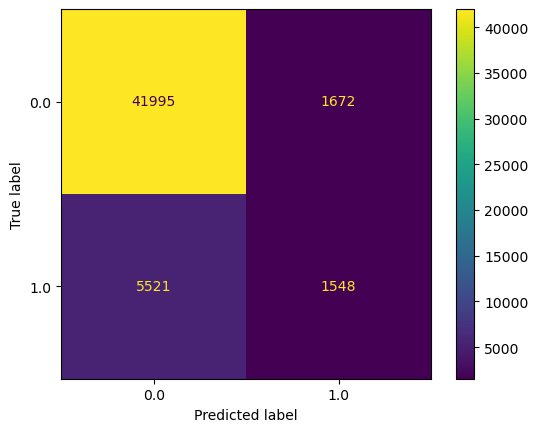

In [9]:
lda = LinearDiscriminantAnalysis()

lda_cross_validation_scores = cross_val_score(lda, x_train, y_train, cv=5, scoring='accuracy')
mean_lda_cross_validation_accuracy = lda_cross_validation_scores.mean()
print(f'LDA cross validation accuracy: {mean_lda_cross_validation_accuracy}')
lda.fit(x_train, y_train)
y_pred_lda = lda.predict(x_test)
cm_lda = confusion_matrix(y_test, y_pred_lda)
cm_lda_display = ConfusionMatrixDisplay(confusion_matrix=cm_lda, display_labels=lda.classes_)
cm_lda_display.plot()

The first classifier I chose to use is LDA. LDA is a special case of plug in MAP classifier that assumes the likelihood functions are gaussian with different means but with the same covariance matrix. We begin by evaluating the models performance on the training data using 5 fold cross validation. The training data is split into 5 folds and for each fold 4 folds are used to train the model and the left over fold is used as test data. We repeat this process for all 5 folds and average the accuracies from each fold to obtain the cross validation accuracy which is 0.8607. Next, we train the model using all of the training data and then evaluate the performance on the test data. From the confusion matrix above we see the following metrics: TP = 1548, FN = 5521, FP = 1672, TN = 41995. 
https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html

We trained the LDA classifier above using the data without PCA applied to it. Now I would like to discover the difference in accuracy of the LDA classifier when using the data with PCA applied to it which I will do below. 

LDA after PCA cross validation accuracy: 0.8567979318907717


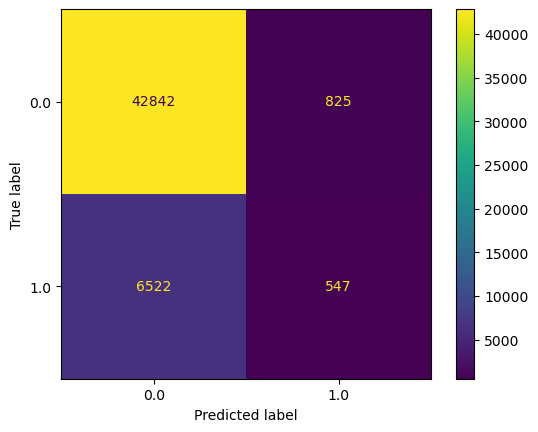

In [10]:
lda_pca = LinearDiscriminantAnalysis()

lda_pca_cross_validation_scores = cross_val_score(lda_pca, x_train_pca, y_train, cv=5, scoring='accuracy')
mean_lda_pca_cross_validation_accuracy = lda_pca_cross_validation_scores.mean()
print(f'LDA after PCA cross validation accuracy: {mean_lda_pca_cross_validation_accuracy}')
lda_pca.fit(x_train_pca, y_train)
y_pred_lda_pca = lda_pca.predict(x_test_pca)
cm_lda_pca = confusion_matrix(y_test, y_pred_lda_pca)
cm_lda_pca_display = ConfusionMatrixDisplay(confusion_matrix=cm_lda_pca, display_labels=lda_pca.classes_)
cm_lda_pca_display.plot()

We perform the same exact process above but this time we use the data after PCA has been performed. Using the data after PCA has been applied we see that our cross validation accuracy this time is lower with a value of 0.8568. From the confusion matrix above we see the following metrics: TP = 547, FN = 6522, FP = 825, TN = 42842.

We see that LDA on the original data achieves a slighlty higher cross validation accuracy compared to the data after PCA has been performed. We see that data after PCA results in less True Positive predictions and more False Negative predictions but it also results in less False Positive Predictions and more True Negative predictions. Although PCA reduces the dimensionality of the data it reduces the performance of the model as some important information is probably lost in the transformation. 

https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay

QDA cross validation accuracy: 0.7557799266741354


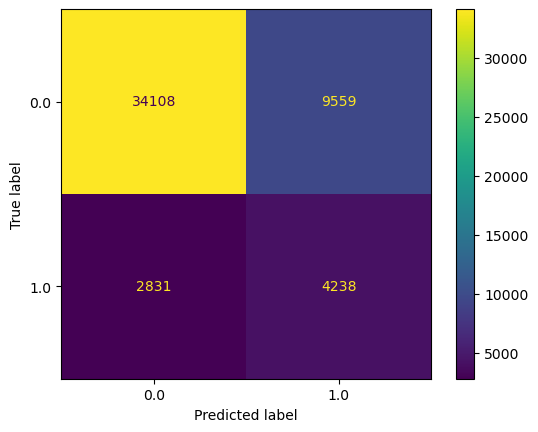

In [11]:
qda = QuadraticDiscriminantAnalysis()

qda_cross_validation_scores = cross_val_score(qda, x_train, y_train, cv=5, scoring='accuracy')
mean_qda_cross_validation_accuracy = qda_cross_validation_scores.mean()
print(f'QDA cross validation accuracy: {mean_qda_cross_validation_accuracy}')
qda.fit(x_train, y_train)
y_pred_qda = qda.predict(x_test)
cm_qda = confusion_matrix(y_test, y_pred_qda)
cm_qda_display = ConfusionMatrixDisplay(confusion_matrix=cm_qda, display_labels=qda.classes_)
cm_qda_display.plot()

The next classifier I chose to use is QDA. I chose QDA as I wanted to see how it performs on the data compared to LDA. QDA like LDA also assumes the likelihood functions are gaussian with different means but instead od assuming the classes have the same covariance matrix it assumes that they have different covariance matrixes. We begin by evaluating the models performance on the training data using 5 fold cross validation. The training data is split into 5 folds and for each fold 4 folds are used to train the model and the left over fold is used as test data. We repeat this process for all 5 folds and average the accuracies from each fold to obtain the cross validation accuracy which is 0.7558. Next, we train the model using all of the training data and then evaluate the performance on the test data. From the confusion matrix above we see the following metrics: TP = 4238, FN = 2831, FP = 9559, TN = 34108.

https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis.html
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay

Again, I would like to compare the performance of the QDA model when it is trained and tested using the data after PCA has been applied to it which I will do below.

QDA after PCA cross validation accuracy: 0.8160477828273537


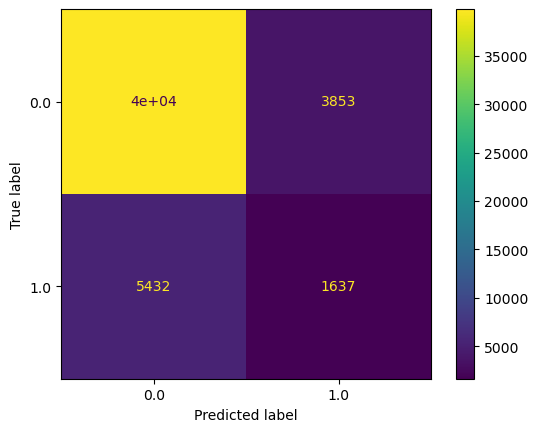

In [12]:
qda_pca = QuadraticDiscriminantAnalysis()

qda_pca_cross_validation_scores = cross_val_score(qda_pca, x_train_pca, y_train, cv=5, scoring='accuracy')
mean_qda_pca_cross_validation_accuracy = qda_pca_cross_validation_scores.mean()
print(f'QDA after PCA cross validation accuracy: {mean_qda_pca_cross_validation_accuracy}')
qda_pca.fit(x_train_pca, y_train)
y_pred_qda_pca = qda_pca.predict(x_test_pca)
cm_qda_pca = confusion_matrix(y_test, y_pred_qda_pca)
cm_qda_pca_display = ConfusionMatrixDisplay(confusion_matrix=cm_qda_pca, display_labels=lda_pca.classes_)
cm_qda_pca_display.plot()

We perform the same exact process above but this time we use the data after PCA has been performed. Using the data after PCA has been applied we see that our cross validation accuracy for QDA this time is higher with a value of 0.8160. From the confusion matrix above we see the following metrics: TP = 1637, FN = 5432, FP = 3853, TN = 40000.

We see that QDA on the data after PCA has been applied achieves a slighlty higher cross validation accuracy compared to the data before PCA has been performed. We see that data after PCA results in less True Positive predictions and more False Negative predictions but it also results in less False Positive Predictions and more True Negative predictions. We will further analyze the performance in the next section.

https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis.html
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay

### (e)

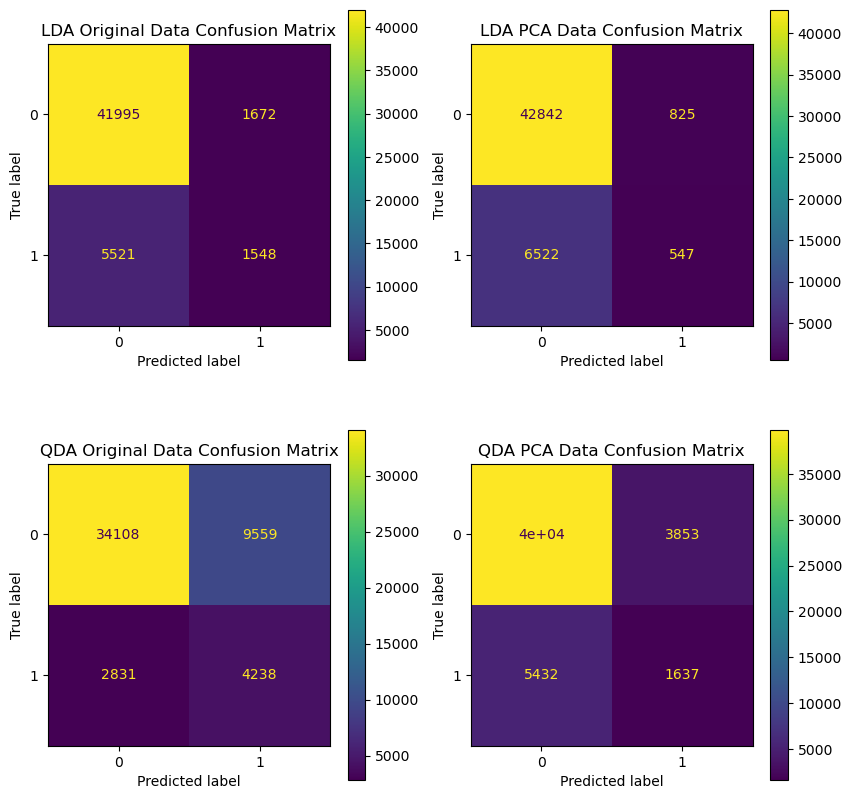

Metrics for LDA Original Data:
TPR: 0.2189842976375725
FPR: 0.038289784047450016
TNR: 0.96171021595255
FNR: 0.7810157023624275
Probability of Misclassification: 0.1417730999684642
Metrics for LDA PCA Data:
TPR: 0.07738011034092517
FPR: 0.018892985549728628
TNR: 0.9811070144502714
FNR: 0.9226198896590748
Probability of Misclassification: 0.14480842005676442
Metrics for QDA Original Data:
TPR: 0.599519026736455
FPR: 0.2189067259028557
TNR: 0.7810932740971442
FNR: 0.40048097326354504
Probability of Misclassification: 0.24420529801324503
Metrics for QDA PCA Data:
TPR: 0.2315744801244872
FPR: 0.08823596766436897
TNR: 0.9117640323356311
FNR: 0.7684255198755128
Probability of Misclassification: 0.1830061494796594


In [13]:
def calc_metrics(cm):
    TP = cm[1, 1]
    FN = cm[1, 0]
    FP = cm[0, 1]
    TN = cm[0, 0]
    
    TPR = TP / (TP + FN)  
    FPR = FP / (FP + TN)  
    TNR = TN / (FP + TN)  
    FNR = FN / (TP + FN)  
    P_misclassification = (FP + FN) / (TP + FN + FP + TN)
    return {"TPR": TPR, "FPR": FPR, "TNR": TNR, "FNR": FNR, "Pmis": P_misclassification}

results = {}
lda_metrics = calc_metrics(cm_lda)
results["LDA Original Data"] = lda_metrics
lda_pca_metrics = calc_metrics(cm_lda_pca)
results["LDA PCA Data"] = lda_pca_metrics
qda_metrics = calc_metrics(cm_qda)
results["QDA Original Data"] = qda_metrics
qda_pca_metrics = calc_metrics(cm_qda_pca)
results["QDA PCA Data"] = qda_pca_metrics

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()
confusion_matrices = {
    "LDA Original Data": cm_lda,
    "LDA PCA Data": cm_lda_pca,
    "QDA Original Data": cm_qda,
    "QDA PCA Data": cm_qda_pca}
for i, (name, cm) in enumerate(confusion_matrices.items()):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(ax=axes[i])
    axes[i].set_title(f'{name} Confusion Matrix')
plt.show()
for name, metric_values in results.items():
    print(f"Metrics for {name}:")
    print(f"TPR: {metric_values['TPR']:}")
    print(f"FPR: {metric_values['FPR']:}")
    print(f"TNR: {metric_values['TNR']:}")
    print(f"FNR: {metric_values['FNR']:}")
    print(f"Probability of Misclassification: {metric_values['Pmis']:}")

Analyzing the metrics above we first see that LDA generally produces a lower probability of error compared to QDA regardless of whether the data is used before PCA is applied or after it is applied. Further looking at the metrics we see that QDA performed using the data before PCA is applied achieves the highest TPR meaning it is best at correctly identifying individuals with diabetes/prediabetes. Next we analyze the FPR and see that LDA performed using the data after PCA has been applied achieves the lowest FPR meaning out of all the model it incorrectly identifies individuals without Diabetes/prediabetes as diabetic/prediabetic the least. Next we analyze TNR and see that LDA performed using the data after PCA has been applied achieves the highest TNR meaning out of all the models it correctly identifies individuals without diabetes the best. Next we analyze FNR and see QDA performed using the data before PCA is applied achieves the lowest FNR out of all the models meaning it incorrectly identifies individuals with diabetes as without diabetes the least. 

Our goal is to choose the model that achieves a good balance between the True Positive Rate and True Negative Rate to avoid overdiagnosis or underdiagnosis. This is best achieved by the QDA model that uses the data before PCA is performed. It achieves the highest TPR meaning it is the best at correctly identifying individuals with diabetes/prediabetes. Along with this it achieves the lowest FNR meaning it is the least likely to misclassify individuals that are diabetic/prediabetic as non diabetic. Although it has the highest probability of misclassification and highest FPR meaning it misclassifies indiduals that are non diabetic as diabetic/prediabetic the most it correctly identifies individuals with diabetes/prediabetes the most which is the priority of the model. This is why we choose QDA using the data before PCA is performed as it is the best for identifying diabetic/prediabetic individuals. 

### (f)

The dataset might have biases as the data was collected using a phone call survey. Due to this it can be possible that certain demographics are underrepresented in the survey which would mean the model does not generalize well to the general population. Along with this false positves are a concern as this means individuals without diabetes/prediabetes are incorrectly classified as diabetic which can cause unnecessary doctor visisits and health care costs for these indivudals. False negatives are also a concer as this mean individuals with diabetes/prediabetes are incorrectkly classified as non diabetic/prediabetic which can lead to severe health complications for these undiagnosed individuals. 

### (g)

https://builtin.com/data-science/step-step-explanation-principal-component-analysis

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

https://medium.com/@TheDataScience-ProF/point-biserial-correlation-32440e373718

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pointbiserialr.html

https://datascientest.com/en/calculate-correlation-between-two-variables-how-do-you-measure-dependence

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay

https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis.html

https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html